In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In [15]:
df=pd.read_csv("playstore-analysis.csv")

In [16]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df.dropna(subset=['Rating'],inplace=True) #remove all record in which rating is null

In [18]:
df[df['Android Ver'].isnull()] #last record has all wrong data in their column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
df.drop(index=10472,inplace=True) #so i removed the last record

In [20]:
from statistics import mode
df['Android Ver'].fillna(value=mode(df['Android Ver']),inplace=True)

In [21]:
df.loc[[4453,4490]] #after using mode

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


In [22]:
df[df['Current Ver'].isnull()] #same for current version 
#we will not drop any as all record looks fine

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [23]:
df['Current Ver'].fillna(value=mode(df['Current Ver']),inplace=True) #fill null with most common value

In [24]:
df.loc[[15,1553,6322,7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


In [25]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [26]:
df.describe()

,Rating,Size
count,9366.000000,9366.000000
mean,4.191757,22705.733753
std,0.515219,21305.040123
min,1.000000,8.500000
25%,4.000000,6600.000000
50%,4.300000,21000.000000
75%,4.500000,27000.000000
max,5.000000,100000.000000


In [27]:
df.dtypes #data types of all column here we can see that some contain numeric data but has object data type
#but first lets clean the price which has dollor sign and object format

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [28]:
def price(x):
    if x=='0':
        return x
    else:
        return x[1:]
df['Price']=df['Price'].apply(lambda x: price(x)) #this will remove dollor sign

In [29]:
df['Price']=df['Price'].astype('float')

In [30]:
#df[df['Installs'].isnull()]
def install(x):
    x=x.split('+')
    y=x[0].split(',')
    return "".join(y)

df['Installs']=df['Installs'].apply(lambda x: install(x)) #this will remove comma and + sign

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
df['Installs']=df['Installs'].astype('int') #converted to integer

In [33]:
df['Reviews']=df['Reviews'].astype('int') #convert reviews to integer

In [34]:
df.dtypes #all are converted to right format

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [35]:
df[df['Rating']>5] #no rating is greater than 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [36]:
df[df['Reviews']>df['Installs']] #Reviews should not be more than installs as only those who installed can review the
#app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [37]:
df.drop(index=df[df['Reviews']>df['Installs']].index,inplace=True)

In [39]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


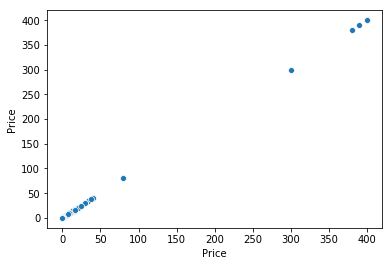

In [41]:
sns.scatterplot(x='Price',y='Price',data=df) #most of the data are between 0-50. We can't consider the data with price 
#more than 50 as they are our outliers that can affect our analysis

In [26]:
#sns.distplot(df['Price'],bins=5)

In [42]:
df.drop(index=df[df['Price']>=30].index,inplace=True)

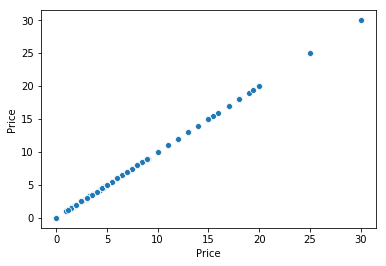

In [43]:
sns.scatterplot(x='Price',y='Price',data=df) #without outliers

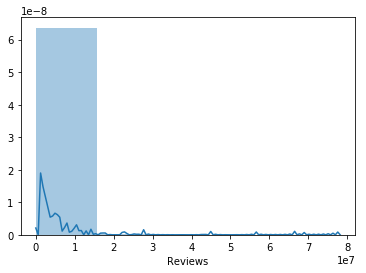

In [29]:
sns.distplot(df['Reviews'],bins=5) #so most of the data are less than 1 million reviews so we remove all above it

In [44]:
df.drop(index=df[df['Reviews']>=1000000].index,inplace=True)

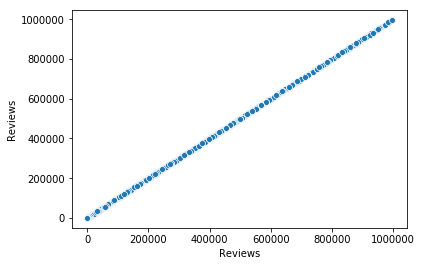

In [45]:
sns.scatterplot(x='Reviews',y='Reviews',data=df) #without outliers

In [32]:
df['Installs'].quantile(q=0.95) #checking the 95th percentile of the data to remove the outliers i.e. last 5s

10000000.0

In [33]:
df.drop(index=df[df['Installs']>10000000].index,inplace=True)  #removing last 5% which are outliers

In [55]:
df.to_csv('play_store_cleaned.csv')

### Data Analysis Starts From Here

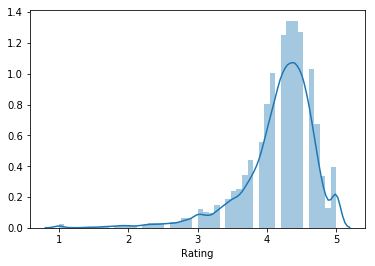

In [34]:
sns.distplot(df['Rating'])

Distribution of Ratings is a Left skewed distribution (Mean is smaller than median)
as Most of the ratings are between 4-4.5 so most of the app perform well

We should use some other variable with rating to get clear idea of the performance of the applications 


In [35]:
df['Content Rating'].value_counts() #as content rating is very less for adults and unrated as they wont needed for
#analysis

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [36]:
df.drop(index=df[df['Content Rating']=='Adults only 18+'].index,inplace=True)

In [37]:
df.drop(index=df[df['Content Rating']=='Unrated'].index,inplace=True)

In [38]:
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

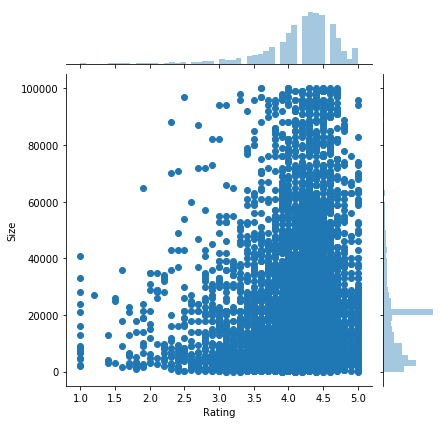

In [39]:
sns.jointplot(x='Rating',y='Size',data=df)

we can see from the graph that Most of the app are from 15mb to 40mb and as we know all the rating of apps are quiet well of 4-4.5

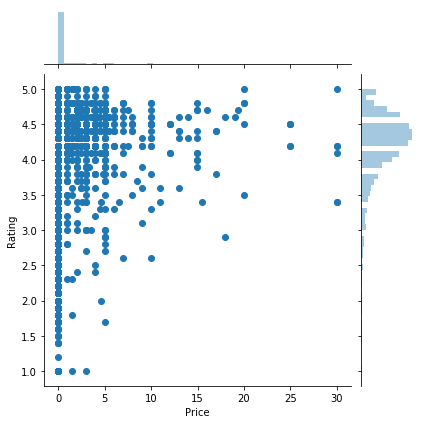

In [40]:
sns.jointplot(x='Price',y='Rating',data=df)

Here we can say that paid apps are mostly highly rated
Exceptional is there of 0 which are free apps which has mixed ratings

Let us remove the free apps and observe only the paid apps

In [41]:
df1=df[df['Price']>0.0]

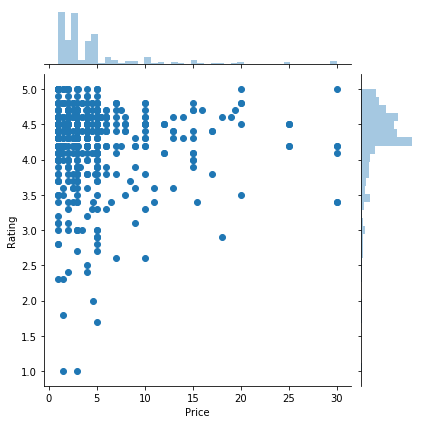

In [42]:
sns.jointplot(x='Price',y='Rating',data=df1)

As the free apps removed we get a clear idea and here we can conclude that paid apps are highly rated

In [43]:
df2=df[['Reviews', 'Size', 'Rating', 'Price']]

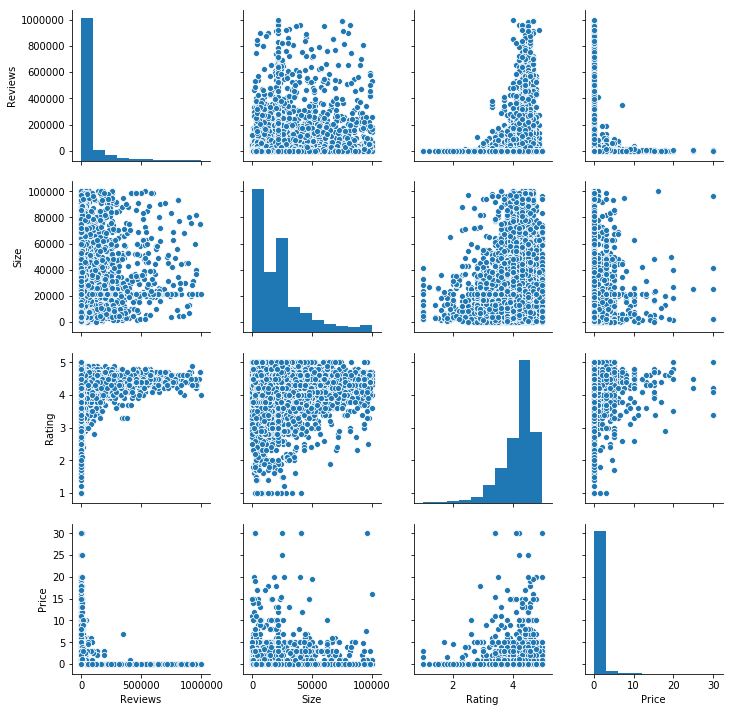

In [44]:
sns.pairplot(df2)

Tere is some pattern in size vs price let us explore that

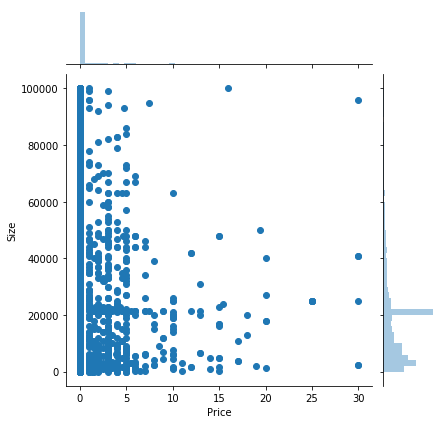

In [50]:
sns.jointplot(x='Price',y='Size',data=df)

Most of the priced items are of lesser size so we can say that People prefer to pay for app of lesser size or app are designed in such a way that they are not bulky

We can conclude from this is that bulky app may not perform well in the market

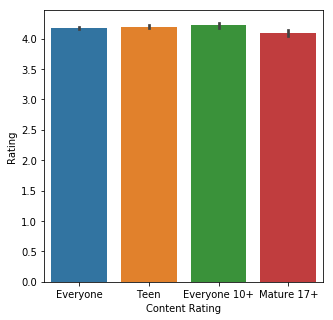

In [46]:
from statistics import mode
plt.figure(figsize=(5,5))
sns.barplot(x='Content Rating',y='Rating',data=df)

We can see that at an average all the ratings are nearly the same (close to 4) irrespective of the content rating

But in mature 17+ it looks like they are lower than others

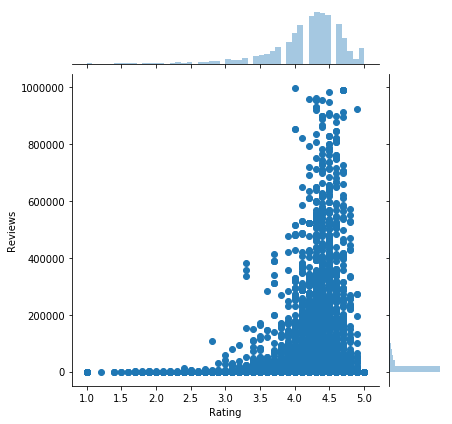

In [54]:
sns.jointplot(x='Rating',y='Reviews',data=df)

Seems like well known apps(more reviews) gets higher ratings 

In [1]:
# Insights